In [11]:
from matplotlib import pyplot
from numpy.random import rand
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from numpy import zeros
from numpy import ones
from numpy import hstack
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense

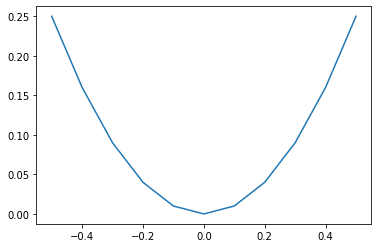

In [12]:
# simple function
def calculate(x):
	return x * x
 
# define inputs
inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
# calculate outputs
outputs = [calculate(x) for x in inputs]
# plot the result
pyplot.plot(inputs, outputs)
pyplot.show()

(100,)
(100,)
(100, 2)


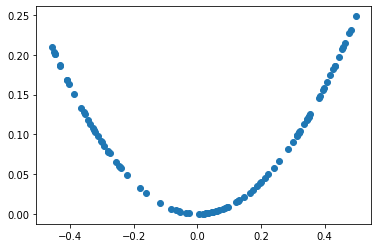

In [13]:
# generate randoms sample from x^2
def generate_samples(n=100):
    # generate random inputs in [-0.5, 0.5]
    X1 = rand(n) - 0.5
    print(X1.shape)
    # generate outputs X^2 (quadratic)
    X2 = X1 * X1
    print(X2.shape)
    # stack arrays
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    return hstack((X1, X2))
 
# generate samples
data = generate_samples()
print(data.shape)
# plot samples
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

In [14]:
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
# define the discriminator model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [15]:
# generate n real samples with class labels
def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = ones((n, 1))
	return X, y

In [16]:
# generate n fake samples with class labels
def generate_fake_samples(n):
	# generate inputs in [-1, 1]
	X1 = -1 + rand(n) * 2
	# generate outputs in [-1, 1]
	X2 = -1 + rand(n) * 2
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = zeros((n, 1))
	return X, y

In [17]:
# train the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
	half_batch = int(n_batch / 2)
	# run epochs manually
	for i in range(n_epochs):
		# generate real examples
		X_real, y_real = generate_real_samples(half_batch)
		# update model
		model.train_on_batch(X_real, y_real)
		# generate fake examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update model
		model.train_on_batch(X_fake, y_fake)
		# evaluate the model
		_, acc_real = model.evaluate(X_real, y_real, verbose=0)
		_, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
		print(i, acc_real, acc_fake)

In [18]:
# define the discriminator model
model = define_discriminator()
# fit the model
train_discriminator(model)

0 0.09375 0.421875
1 0.078125 0.4375
2 0.0625 0.5
3 0.046875 0.5625
4 0.09375 0.578125
5 0.015625 0.46875
6 0.03125 0.625
7 0.109375 0.515625
8 0.03125 0.546875
9 0.078125 0.5
10 0.046875 0.609375
11 0.109375 0.625
12 0.0 0.4375
13 0.078125 0.546875
14 0.015625 0.5625
15 0.0 0.515625
16 0.015625 0.546875
17 0.109375 0.5625
18 0.046875 0.578125
19 0.0625 0.59375
20 0.0625 0.609375
21 0.046875 0.5625
22 0.046875 0.5625
23 0.046875 0.59375
24 0.046875 0.5625
25 0.03125 0.546875
26 0.125 0.578125
27 0.015625 0.453125
28 0.046875 0.6875
29 0.078125 0.53125
30 0.0625 0.6875
31 0.078125 0.609375
32 0.078125 0.609375
33 0.078125 0.609375
34 0.046875 0.65625
35 0.046875 0.640625
36 0.03125 0.5625
37 0.046875 0.609375
38 0.078125 0.609375
39 0.015625 0.46875
40 0.078125 0.59375
41 0.0625 0.46875
42 0.09375 0.609375
43 0.046875 0.609375
44 0.109375 0.546875
45 0.09375 0.609375
46 0.109375 0.59375
47 0.125 0.71875
48 0.078125 0.609375
49 0.109375 0.65625
50 0.0625 0.53125
51 0.1875 0.640625
52 0.1

414 0.953125 0.90625
415 0.890625 0.9375
416 0.90625 0.984375
417 0.828125 0.9375
418 0.84375 0.90625
419 0.828125 0.921875
420 0.921875 0.828125
421 0.859375 0.9375
422 0.890625 0.921875
423 0.875 0.921875
424 0.890625 0.953125
425 0.890625 0.96875
426 0.9375 0.90625
427 0.828125 0.9375
428 0.859375 0.890625
429 0.890625 0.921875
430 0.9375 0.921875
431 0.875 0.921875
432 0.84375 0.96875
433 0.9375 0.84375
434 0.921875 0.890625
435 0.875 0.921875
436 0.859375 0.90625
437 0.84375 0.953125
438 0.875 0.953125
439 0.921875 0.96875
440 0.90625 0.90625
441 0.921875 0.953125
442 0.90625 0.90625
443 0.890625 0.9375
444 0.890625 0.953125
445 0.90625 0.96875
446 0.90625 0.953125
447 0.890625 0.953125
448 0.890625 0.921875
449 0.921875 0.859375
450 0.890625 0.90625
451 0.9375 0.875
452 0.9375 0.875
453 0.921875 0.90625
454 0.953125 0.890625
455 0.875 0.921875
456 0.9375 0.875
457 0.921875 0.921875
458 0.890625 0.953125
459 0.8125 0.953125
460 0.90625 0.90625
461 0.9375 0.953125
462 0.90625 0.921

876 1.0 0.875
877 1.0 0.90625
878 1.0 0.890625
879 1.0 0.859375
880 1.0 0.84375
881 1.0 0.78125
882 1.0 0.890625
883 1.0 0.90625
884 1.0 0.828125
885 1.0 0.890625
886 1.0 0.78125
887 1.0 0.921875
888 1.0 0.890625
889 1.0 0.859375
890 1.0 0.859375
891 1.0 0.859375
892 1.0 0.828125
893 1.0 0.90625
894 1.0 0.890625
895 1.0 0.90625
896 1.0 0.953125
897 1.0 0.875
898 1.0 0.84375
899 1.0 0.875
900 1.0 0.890625
901 1.0 0.890625
902 1.0 0.875
903 1.0 0.921875
904 1.0 0.796875
905 1.0 0.859375
906 1.0 0.90625
907 1.0 0.90625
908 1.0 0.796875
909 1.0 0.875
910 1.0 0.921875
911 1.0 0.875
912 1.0 0.8125
913 1.0 0.859375
914 1.0 0.8125
915 1.0 0.84375
916 1.0 0.890625
917 1.0 0.875
918 1.0 0.828125
919 1.0 0.921875
920 1.0 0.890625
921 1.0 0.90625
922 1.0 0.890625
923 1.0 0.890625
924 1.0 0.859375
925 1.0 0.84375
926 1.0 0.84375
927 1.0 0.796875
928 1.0 0.9375
929 1.0 0.859375
930 1.0 0.796875
931 1.0 0.84375
932 1.0 0.859375
933 1.0 0.875
934 1.0 0.875
935 1.0 0.859375
936 1.0 0.84375
937 1.0 0.87

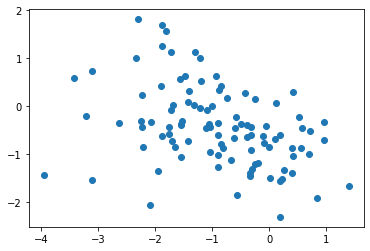

In [19]:
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input
 
# use the generator to generate n fake examples and plot the results
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# plot the results
	pyplot.scatter(X[:, 0], X[:, 1])
	pyplot.show()
 
# size of the latent space
latent_dim = 5
# define the discriminator model
model = define_generator(latent_dim)
# generate and plot generated samples
generate_fake_samples(model, latent_dim, 100)

In [22]:
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model
 
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model
 
# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 2)                 122       
_________________________________________________________________
sequential_8 (Sequential)    (None, 1)                 101       
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [23]:
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)

In [24]:
# generate n real samples with class labels
def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = ones((n, 1))
	return X, y

1999 0.7599999904632568 0.1599999964237213


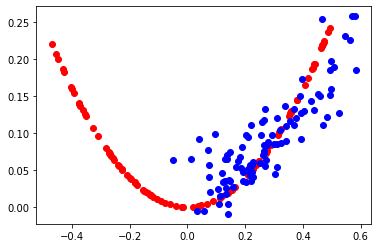

3999 0.6299999952316284 0.33000001311302185


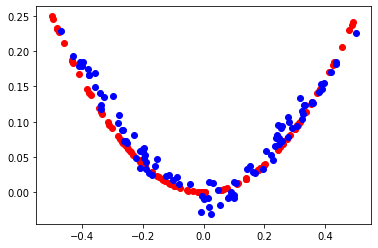

5999 0.5600000023841858 0.5699999928474426


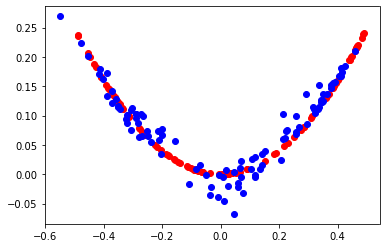

7999 0.5 0.550000011920929


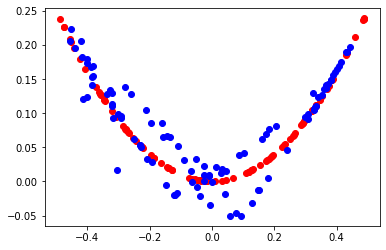

9999 0.6700000166893005 0.41999998688697815


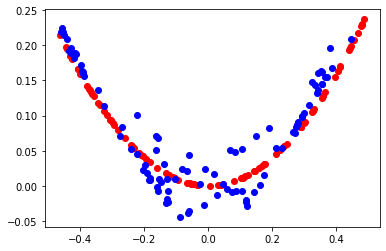

In [26]:
#define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model
 
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model
 
# generate n real samples with class labels
def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = ones((n, 1))
	return X, y
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input
 
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = zeros((n, 1))
	return X, y
 
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
	# scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
	pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
	pyplot.show()
 
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim)
 
# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)